In [2]:
import pandas as pd
import json
import geopandas as gpd
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import html

filename = "Takeout\Location History\Location History.JSON"

The takeout location history is pretty large and hard to deal with so I did my best to only do it once.  Once a dataset was converted to a pandas dataframe it was pretty easy to work with and was saved in a pickle file for future use.

In [6]:
#open json file and convert to pandas dataframe
with open(filename) as json_file:
    data = json.load(json_file)
df = pd.json_normalize(data['locations'])

#convert millisecond time stamp to something readable for future filtering
df['DateTime'] = pd.to_datetime(df['timestampMs'], unit='ms')
df['Date']=df['DateTime'].dt.strftime('%Y-%m-%d')

#convert lat and long to non-scientific notation
df['latitude'] = df['latitudeE7']/10000000
df['longitude'] = df['longitudeE7']/10000000
print(df.shape)
print(df.columns)

(2332682, 13)
Index(['timestampMs', 'latitudeE7', 'longitudeE7', 'accuracy', 'activity',
       'velocity', 'heading', 'altitude', 'verticalAccuracy', 'DateTime',
       'Date', 'latitude', 'longitude'],
      dtype='object')


In [39]:
#save so cell above doesn't need to be run again
df.to_pickle('LocationHistorydf.pkl')

## Start Here

In [7]:
#load the dataset
df=pd.read_pickle('LocationHistorydf.pkl')
print(df.shape)
print(df.columns)

(2332682, 13)
Index(['timestampMs', 'latitudeE7', 'longitudeE7', 'accuracy', 'activity',
       'velocity', 'heading', 'altitude', 'verticalAccuracy', 'DateTime',
       'Date', 'latitude', 'longitude'],
      dtype='object')


In [11]:
#Only select the days of the trip. Luckily those days we only drove for the trip so there is no more filtering necessary.
mask = (df['Date'] >= '2020-05-21') & (df['Date'] <= '2020-05-23')
sdf = df.loc[mask].copy()
sdf.reset_index(inplace=True,drop=True)
print(sdf.shape)
sdf.iloc[1000:1010]

(6851, 13)


,timestampMs,latitudeE7,longitudeE7,accuracy,activity,velocity,heading,altitude,verticalAccuracy,DateTime,Date,latitude,longitude
1000,1590096647715,310445823,-1049149780,3,"[{'timestampMs': '1590096655466', 'activity': ...",2.0,288.0,1344.0,NaN,2020-05-21 21:30:47.715,2020-05-21,31.044582,-104.914978
1001,1590096659768,310458717,-1049192276,3,NaN,2.0,289.0,1352.0,NaN,2020-05-21 21:30:59.768,2020-05-21,31.045872,-104.919228
1002,1590096707715,310511360,-1049362487,3,NaN,2.0,287.0,1375.0,NaN,2020-05-21 21:31:47.715,2020-05-21,31.051136,-104.936249
1003,1590096723714,310528049,-1049418029,3,NaN,2.0,290.0,1388.0,NaN,2020-05-21 21:32:03.714,2020-05-21,31.052805,-104.941803
1004,1590096753765,310546436,-1049529876,3,NaN,2.0,284.0,1398.0,NaN,2020-05-21 21:32:33.765,2020-05-21,31.054644,-104.952988
1005,1590096768766,310570640,-1049577636,3,NaN,2.0,312.0,1407.0,NaN,2020-05-21 21:32:48.766,2020-05-21,31.057064,-104.957764
1006,1590096769764,310572834,-1049580383,3,NaN,2.0,312.0,1407.0,NaN,2020-05-21 21:32:49.764,2020-05-21,31.057283,-104.958038
1007,1590096785714,310602531,-1049630432,3,NaN,2.0,291.0,1410.0,NaN,2020-05-21 21:33:05.714,2020-05-21,31.060253,-104.963043
1008,1590096800814,310607624,-1049686355,3,"[{'timestampMs': '1590096807544', 'activity': ...",2.0,268.0,1421.0,NaN,2020-05-21 21:33:20.814,2020-05-21,31.060762,-104.968636
1009,1590096816763,310610561,-1049747924,3,NaN,2.0,277.0,1420.0,NaN,2020-05-21 21:33:36.763,2020-05-21,31.061056,-104.974792


In [10]:
#create the geodataframe
gdf = gpd.GeoDataFrame(sdf, geometry=gpd.points_from_xy(sdf.longitude, sdf.latitude))
print(gdf.shape)
gdf.iloc[1000:1010]

(6851, 14)


,timestampMs,latitudeE7,longitudeE7,accuracy,activity,velocity,heading,altitude,verticalAccuracy,DateTime,Date,latitude,longitude,geometry
1000,1590096647715,310445823,-1049149780,3,"[{'timestampMs': '1590096655466', 'activity': ...",2.0,288.0,1344.0,NaN,2020-05-21 21:30:47.715,2020-05-21,31.044582,-104.914978,POINT (-104.91498 31.04458)
1001,1590096659768,310458717,-1049192276,3,NaN,2.0,289.0,1352.0,NaN,2020-05-21 21:30:59.768,2020-05-21,31.045872,-104.919228,POINT (-104.91923 31.04587)
1002,1590096707715,310511360,-1049362487,3,NaN,2.0,287.0,1375.0,NaN,2020-05-21 21:31:47.715,2020-05-21,31.051136,-104.936249,POINT (-104.93625 31.05114)
1003,1590096723714,310528049,-1049418029,3,NaN,2.0,290.0,1388.0,NaN,2020-05-21 21:32:03.714,2020-05-21,31.052805,-104.941803,POINT (-104.94180 31.05280)
1004,1590096753765,310546436,-1049529876,3,NaN,2.0,284.0,1398.0,NaN,2020-05-21 21:32:33.765,2020-05-21,31.054644,-104.952988,POINT (-104.95299 31.05464)
1005,1590096768766,310570640,-1049577636,3,NaN,2.0,312.0,1407.0,NaN,2020-05-21 21:32:48.766,2020-05-21,31.057064,-104.957764,POINT (-104.95776 31.05706)
1006,1590096769764,310572834,-1049580383,3,NaN,2.0,312.0,1407.0,NaN,2020-05-21 21:32:49.764,2020-05-21,31.057283,-104.958038,POINT (-104.95804 31.05728)
1007,1590096785714,310602531,-1049630432,3,NaN,2.0,291.0,1410.0,NaN,2020-05-21 21:33:05.714,2020-05-21,31.060253,-104.963043,POINT (-104.96304 31.06025)
1008,1590096800814,310607624,-1049686355,3,"[{'timestampMs': '1590096807544', 'activity': ...",2.0,268.0,1421.0,NaN,2020-05-21 21:33:20.814,2020-05-21,31.060762,-104.968636,POINT (-104.96864 31.06076)
1009,1590096816763,310610561,-1049747924,3,NaN,2.0,277.0,1420.0,NaN,2020-05-21 21:33:36.763,2020-05-21,31.061056,-104.974792,POINT (-104.97479 31.06106)


In [56]:
#Find the rows corresponding to each stop. I found the longitude for each stop (since the trip was mostly east-west, the 
#longitude was sufficient).  The used argsort to find the row that had a longitude closest to the stop's longitude.
#I used this to color the legs of the trip.
a = -103.520662
b = -104.502089
c = -106.280812
d = -107.753511
e = -109.842006
f = -110.949974
g = -111.962290
h = -113.610015
i = -115.250982
j = -116.395796
k = -117.216111
l = -118.630112
display(gdf.loc[(gdf['longitude']-a).abs().argsort()[:1],['latitude','longitude']])
display(gdf.loc[(gdf['longitude']-b).abs().argsort()[:1],['latitude','longitude']])
display(gdf.loc[(gdf['longitude']-c).abs().argsort()[:1],['latitude','longitude']])
display(gdf.loc[(gdf['longitude']-d).abs().argsort()[:1],['latitude','longitude']])
display(gdf.loc[(gdf['longitude']-e).abs().argsort()[:1],['latitude','longitude']])
display(gdf.loc[(gdf['longitude']-f).abs().argsort()[:1],['latitude','longitude']])
display(gdf.loc[(gdf['longitude']-g).abs().argsort()[:1],['latitude','longitude']])
display(gdf.loc[(gdf['longitude']-h).abs().argsort()[:1],['latitude','longitude']])
display(gdf.loc[(gdf['longitude']-i).abs().argsort()[:1],['latitude','longitude']])
display(gdf.loc[(gdf['longitude']-j).abs().argsort()[:1],['latitude','longitude']])
display(gdf.loc[(gdf['longitude']-k).abs().argsort()[:1],['latitude','longitude']])
display(gdf.loc[(gdf['longitude']-l).abs().argsort()[:1],['latitude','longitude']])

,latitude,longitude
666,31.403694,-103.520645


,latitude,longitude
907,31.063368,-104.50209


,latitude,longitude
1340,31.704374,-106.280731


,latitude,longitude
1809,32.271744,-107.753456


,latitude,longitude
2300,32.265652,-109.84201


,latitude,longitude
2851,32.27671,-110.949974


,latitude,longitude
3272,33.280353,-111.962288


,latitude,longitude
3919,34.699753,-113.610016


,latitude,longitude
4638,36.218567,-115.250992


,latitude,longitude
4977,36.643954,-116.395781


,latitude,longitude
5557,38.056652,-117.216118


,latitude,longitude
6016,38.536022,-118.63002


In [75]:
#Colors were made in excel (conditional formatting of mpg) and codes were retrieved from powerpoint. (see GasPrices.xlsx)
gdf.loc[:666,'colors'] = '#FDD680'
gdf.loc[666:906,'colors'] = '#F8696B'
gdf.loc[906:1335,'colors'] = '#C9DC81'
gdf.loc[1335:1809,'colors'] = '#E2E383'
gdf.loc[1809:2295,'colors'] = '#FBEA84'
gdf.loc[2295:2851,'colors'] = '#FA8E72'
gdf.loc[2851:3272,'colors'] = '#F9806F'
gdf.loc[3272:3919,'colors'] = '#83C87D'
gdf.loc[3919:4638,'colors'] = '#63BE7B'
gdf.loc[4638:4975,'colors'] = '#FEE783'
gdf.loc[4975:5557,'colors'] = '#FA8E72'
gdf.loc[5557:6016,'colors'] = '#ABD380'
gdf.loc[6016:,'colors'] = '#000000'

for tag in gdf['colors'].unique():    
    display(Markdown(('<text style=color:{}>{}</text>'.format(tag,tag))))

<text style=color:#FDD680>#FDD680</text>

<text style=color:#F8696B>#F8696B</text>

<text style=color:#C9DC81>#C9DC81</text>

<text style=color:#E2E383>#E2E383</text>

<text style=color:#FBEA84>#FBEA84</text>

<text style=color:#FA8E72>#FA8E72</text>

<text style=color:#F9806F>#F9806F</text>

<text style=color:#83C87D>#83C87D</text>

<text style=color:#63BE7B>#63BE7B</text>

<text style=color:#FEE783>#FEE783</text>

<text style=color:#ABD380>#ABD380</text>

<text style=color:#000000>#000000</text>

In [49]:
#I played around with changing the size but it wasn't initially successful so I dropped the idea.
#Still might be cool to change size with elevation change/average speed/average wind speed since those seemed to have big
#impacts on mpg
gdf.loc[:666,'size'] = 21
gdf.loc[666:906,'size'] = 5
gdf.loc[906:1335,'size'] = 38
gdf.loc[1335:1809,'size'] = 34
gdf.loc[1809:2295,'size'] = 30
gdf.loc[2295:2851,'size'] = 13
gdf.loc[2851:3272,'size'] = 9
gdf.loc[3272:3919,'size'] = 46
gdf.loc[3919:4638,'size'] = 50
gdf.loc[4638:4975,'size'] = 25
gdf.loc[4975:5557,'size'] = 17
gdf.loc[5557:6016,'size'] = 42
gdf.loc[6016:,'size'] = 5

gdf['size']

0       21
1       21
2       21
3       21
4       21
        ..
6846     5
6847     5
6848     5
6849     5
6850     5
Name: size, Length: 6851, dtype: object

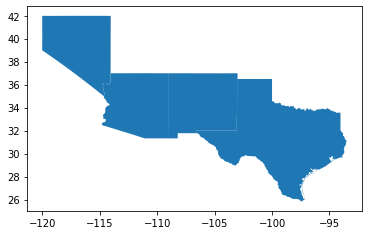

In [79]:
#load map of NV, AZ, NM, and TX and call it map_df
map_df = gpd.read_file('StateMap\st99_d00.shp')
statestokeep=['Nevada', 'Arizona','New Mexico', 'Texas']
map_df = map_df[map_df['NAME'].isin(statestokeep)]
map_df.plot()

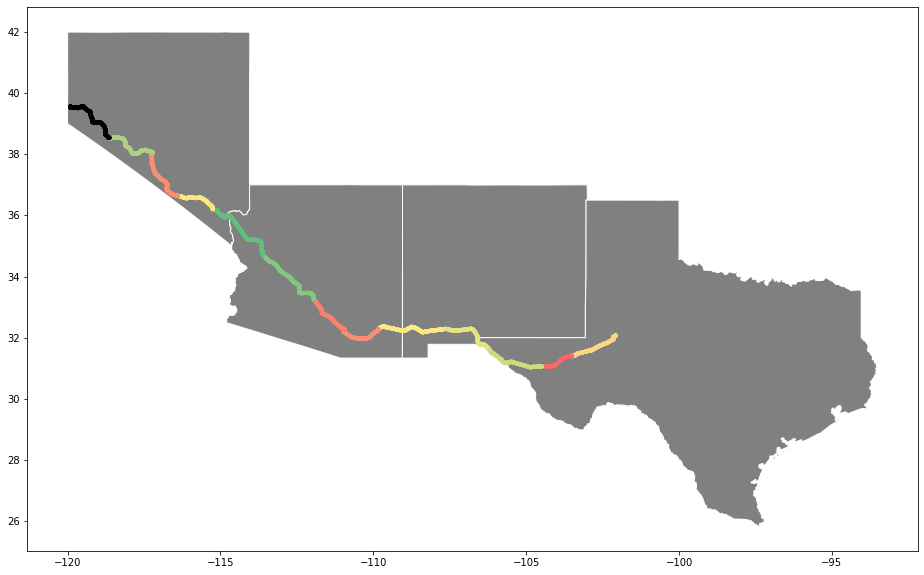

In [78]:
#combine for the finished product.
ax = map_df.plot(color='grey', edgecolor='white',figsize=(20,10)) #states map
gdf.plot(ax=ax, color=gdf['colors'], markersize=10) #route map

plt.savefig('MtR_mapRaw.png', dpi=400) #save for editing in Inkscape
plt.show()